# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [48]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [49]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [50]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [51]:
x_train.shape

(160, 1)

In [52]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


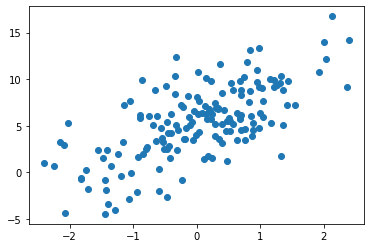

In [53]:
plt.scatter(x_train, y_train)

In [54]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [55]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [56]:
criterion = torch.nn.MSELoss() 

In [57]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 39.749481201171875
h: 2 | epoch: 50, loss: 33.10276412963867
h: 2 | epoch: 100, loss: 25.694034576416016
h: 3 | epoch: 0, loss: 49.285980224609375
h: 3 | epoch: 50, loss: 42.67597198486328
h: 3 | epoch: 100, loss: 37.54210662841797
h: 4 | epoch: 0, loss: 42.0932731628418
h: 4 | epoch: 50, loss: 34.796119689941406
h: 4 | epoch: 100, loss: 28.930383682250977
h: 5 | epoch: 0, loss: 41.90587615966797
h: 5 | epoch: 50, loss: 33.908355712890625
h: 5 | epoch: 100, loss: 25.971105575561523
h: 6 | epoch: 0, loss: 43.07893753051758
h: 6 | epoch: 50, loss: 35.747737884521484
h: 6 | epoch: 100, loss: 30.045312881469727
h: 7 | epoch: 0, loss: 43.983558654785156
h: 7 | epoch: 50, loss: 33.915565490722656
h: 7 | epoch: 100, loss: 24.225343704223633
h: 8 | epoch: 0, loss: 43.304832458496094
h: 8 | epoch: 50, loss: 24.87833595275879
h: 8 | epoch: 100, loss: 13.530160903930664
h: 9 | epoch: 0, loss: 42.72873306274414
h: 9 | epoch: 50, loss: 37.228912353515625
h: 9 | epoch: 100, lo

h: 66 | epoch: 50, loss: 10.521360397338867
h: 66 | epoch: 100, loss: 9.056192398071289
h: 67 | epoch: 0, loss: 38.77117919921875
h: 67 | epoch: 50, loss: 12.27008056640625
h: 67 | epoch: 100, loss: 9.270468711853027
h: 68 | epoch: 0, loss: 48.041622161865234
h: 68 | epoch: 50, loss: 11.378994941711426
h: 68 | epoch: 100, loss: 9.144538879394531
h: 69 | epoch: 0, loss: 41.86155700683594
h: 69 | epoch: 50, loss: 11.503110885620117
h: 69 | epoch: 100, loss: 9.076763153076172
h: 70 | epoch: 0, loss: 44.203125
h: 70 | epoch: 50, loss: 11.84961986541748
h: 70 | epoch: 100, loss: 9.049824714660645
h: 71 | epoch: 0, loss: 48.3348274230957
h: 71 | epoch: 50, loss: 20.339101791381836
h: 71 | epoch: 100, loss: 11.603263854980469
h: 72 | epoch: 0, loss: 44.68568801879883
h: 72 | epoch: 50, loss: 11.410049438476562
h: 72 | epoch: 100, loss: 9.53844928741455
h: 73 | epoch: 0, loss: 41.95696258544922
h: 73 | epoch: 50, loss: 10.548555374145508
h: 73 | epoch: 100, loss: 9.1932373046875
h: 74 | epoch:

In [58]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.979451 ]
 [ 2.7448204]
 [ 3.5728662]
 [ 5.5663147]
 [ 7.9801974]
 [ 1.5967078]
 [ 9.149739 ]
 [ 4.562558 ]
 [ 6.05204  ]
 [ 6.4847717]
 [ 3.0065126]
 [ 2.8475819]
 [ 7.4902   ]
 [ 3.4567156]
 [ 4.3167286]
 [ 2.6975138]
 [ 7.9827304]
 [ 9.556645 ]
 [ 6.78835  ]
 [ 3.5601387]
 [ 1.7585151]
 [ 1.5435033]
 [ 5.2746563]
 [ 3.0769193]
 [ 1.6783106]
 [ 3.576362 ]
 [ 4.275288 ]
 [ 8.1937895]
 [ 4.7484546]
 [ 6.824016 ]
 [ 1.7150693]
 [ 5.8746314]
 [ 5.267602 ]
 [ 8.8125105]
 [ 2.4783924]
 [ 2.5646079]
 [ 1.4719015]
 [ 8.64584  ]
 [ 7.3419113]
 [ 6.3784504]
 [ 7.025908 ]
 [ 6.457316 ]
 [ 5.5355053]
 [ 6.252343 ]
 [ 6.9420214]
 [ 7.563334 ]
 [ 1.4353464]
 [ 7.1853447]
 [ 8.151936 ]
 [ 3.623198 ]
 [ 5.5691233]
 [ 2.5869825]
 [ 1.4556153]
 [ 6.083512 ]
 [11.669928 ]
 [ 2.502377 ]
 [ 5.9591384]
 [ 4.2027597]
 [ 9.302322 ]
 [ 7.031375 ]
 [ 1.5427129]
 [ 5.1455555]
 [ 7.488001 ]
 [ 3.9611123]
 [ 6.0486994]
 [ 4.4516144]
 [ 4.957412 ]
 [ 3.774615 ]
 [ 1.9799528]
 [ 8.552472 ]
 [ 3.768397 ]
 [ 7.4

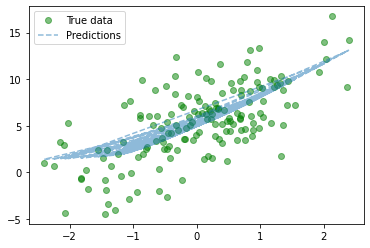

In [60]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

(0.0, 100.0)

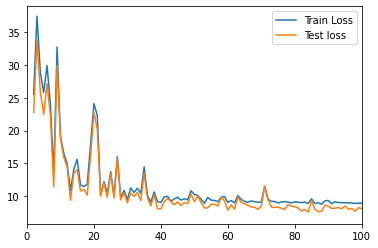

In [61]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

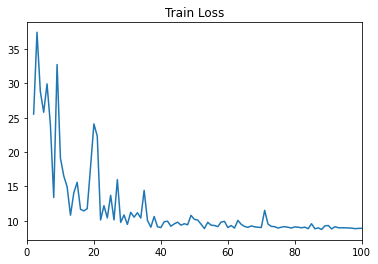

In [62]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

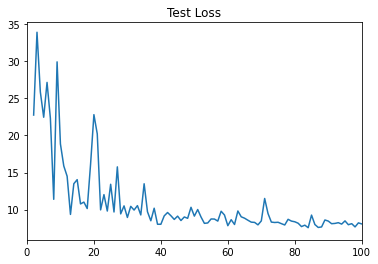

In [63]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)